#Análisis de textura: Matriz de Co-ocurrencia de Niveles de Gris (GLCM)

##Montar el Drive

##Cálculo de la matriz de co-ocurrencia GLCM

La Matriz de Co-ocurrencia de Niveles de Gris (GLCM) es una técnica utilizada en procesamiento de imágenes para analizar la textura de una imagen. Captura la frecuencia con la que se presentan pares de píxeles con valores de gris específicos, separados por una cierta distancia y orientación.

Documentación de librería: [skimage.features](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.graycomatrix)

## Librerías

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.feature import graycomatrix, graycoprops

***Función para reducir niveles de gris, esto es opcional para facilitar el cálculo y la visualización de los resultados***

In [13]:
def reducir_niveles(imagen, n_grey):
    imagen_reducida = np.floor_divide(imagen, 256 // n_grey)
    return imagen_reducida

# Cargar y preprocesar la imagen
path = 'C:/Users/Juan Bautista/.vscode/PSIB/Mejoramiento/Imagenes Mejoramiento/img1.jpg'  # Reemplaza con la ruta de tu imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

niveles = 8  # Número de niveles de gris
img = reducir_niveles(img, niveles)

## Cálculo de la Matriz en todas las direcciónes

In [14]:
# Definir desplazamientos y ángulos
# En scikit-image, los desplazamientos se definen como (dX, dY)
# Por ejemplo, para 0°, 45°, 90°, y 135°, con d=1:
distancias = [1]
angulos = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0°, 45°, 90°, 135°

# Calcular GLCM
glcm = graycomatrix(img,
                    distances=distancias,
                    angles=angulos,
                    levels=niveles,
                    symmetric=True,
                    normed=True)

***Cálculo de los atributos de la matriz***

Recuerden que estos van a caracterizar las texturas de las imagenes.

In [15]:
# Calcular propiedades
contraste = graycoprops(glcm, 'contrast')
energia = graycoprops(glcm, 'energy')
homogeneidad = graycoprops(glcm, 'homogeneity')
correlacion = graycoprops(glcm, 'correlation')

# Mostrar resultados
print("Contraste:")
print(contraste)
print("\nEnergía:")
print(energia)
print("\nHomogeneidad:")
print(homogeneidad)
print("\nCorrelación:")
print(correlacion)

Contraste:
[[0.4869906  0.65087804 0.31894592 0.66850758]]

Energía:
[[0.48400817 0.47678653 0.49255501 0.47653305]]

Homogeneidad:
[[0.86650577 0.8450309  0.89534984 0.8426944 ]]

Correlación:
[[0.93871558 0.91820186 0.95988125 0.91598629]]


## Visualización de resultados

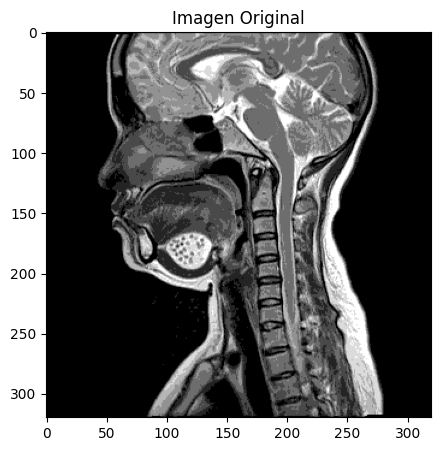

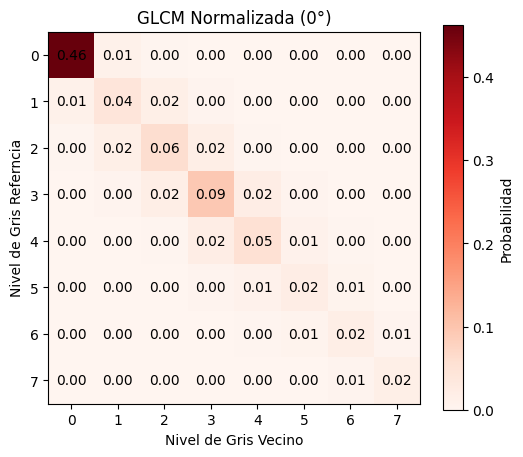

In [16]:
#Visualizar imagen
plt.figure(figsize=(6,5))
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.show()

# Visualizar una GLCM específica (por ejemplo, para 0°)
plt.figure(figsize=(6,5))
plt.imshow(glcm[:, :,0,0], cmap='Reds', interpolation='nearest')
plt.colorbar(label='Probabilidad')
plt.title('GLCM Normalizada (0°)')
plt.xlabel('Nivel de Gris Vecino')
plt.ylabel('Nivel de Gris Referncia')

# Añadir valores numéricos en las celdas
for i in range(niveles):
    for j in range(niveles):
        plt.text(j, i, f'{glcm[i, j, 0, 0]:.2f}',
                 ha='center', va='center', color='black')

plt.show()

## GLCM para una ventana

Cálculo de la Matriz de co-ocurrecia para ventanas de diferentes tamaños.

In [17]:
def calcular_glcm_ventana(imagen, x, y, tamaño_kernel, distancia=1):
    # Extraer la ventana de la imagen
    ventana = imagen[y:y+tamaño_kernel, x:x+tamaño_kernel]

    # Calcular la GLCM
    glcm = graycomatrix(ventana, [distancia], [0], symmetric=True, normed=True)

    # Calcular los atributos
    atributos = {
        'contraste': graycoprops(glcm, 'contrast')[0, 0],
        'homogeneidad': graycoprops(glcm, 'homogeneity')[0, 0],
        'energia': graycoprops(glcm, 'energy')[0, 0],
        'correlacion': graycoprops(glcm, 'correlation')[0, 0]
    }

    return glcm, atributos  # Cambiar para retornar también la GLCM

# Calcular GLCM y atributos para la ventana especificada
glcm_ventana, atributos_ventana = calcular_glcm_ventana(img, x=20, y=20, tamaño_kernel=25)

# Mostrar la GLCM
print("\nAtributos de la ventana:")
print(atributos_ventana)


Atributos de la ventana:
{'contraste': np.float64(0.0), 'homogeneidad': np.float64(1.0), 'energia': np.float64(1.0), 'correlacion': np.float64(1.0)}
